<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names
print("Column Names:")
print(df.columns.tolist())
print("\n" + "-"*50)

# Display data types and non-null counts
print("Data Types and Non-Null Counts:")
print(df.info())
print("\n" + "-"*50)

# Display the shape of the dataset (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display the first few rows to preview the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())


Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Step 3.1: Identify missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

print("Missing Value Summary:")
print(missing_summary)


# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Impute numerical columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm no missing values remain
print("\nRemaining missing values after imputation:")
print(df.isnull().sum().sum())


Missing Value Summary:
                            Missing Values  Percentage (%)
AINextMuch less integrated           64289       98.245641
AINextLess integrated                63082       96.401119
AINextNo change                      52939       80.900714
AINextMuch more integrated           51999       79.464217
EmbeddedAdmired                      48704       74.428840
...                                    ...             ...
YearsCode                             5568        8.508948
NEWSOSites                            5151        7.871693
LearnCode                             4949        7.563000
EdLevel                               4653        7.110656
AISelect                              4530        6.922689

[109 rows x 2 columns]


/tmp/ipykernel_558/3409736585.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_558/3409736585.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_558/3409736585.py:19: FutureWarning: A value is trying to be set on a 


Remaining missing values after imputation:
0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
# Step 4: Analyze Key Columns
# Clean column names by stripping whitespace just to be safe
df.columns = df.columns.str.strip()

# Define key columns to analyze
key_columns = ['Employment', 'JobSat', 'YearsCodePro']

# Iterate and print value counts for each column
for col in key_columns:
    if col in df.columns:
        print(f"\n=== {col} Column Analysis ===")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\n[Warning] Column '{col}' not found in the dataset.")



=== Employment Column Analysis ===
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


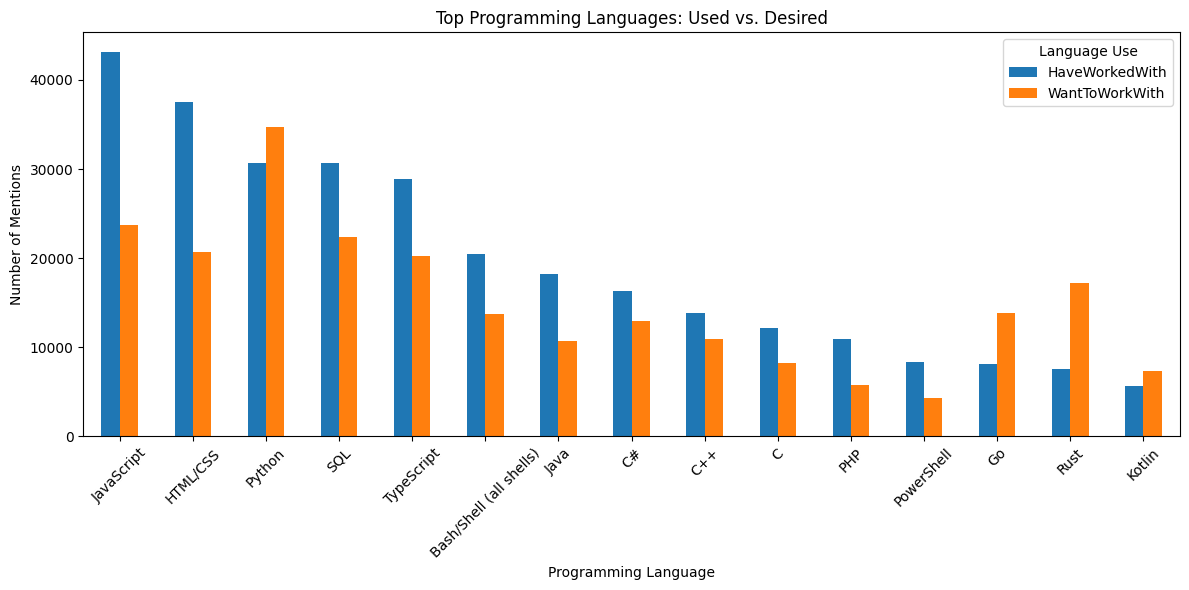

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Split and explode language columns
lang_have = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode().str.strip()
lang_want = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().str.strip()

# Count frequencies
lang_have_counts = lang_have.value_counts()
lang_want_counts = lang_want.value_counts()

# Combine into a DataFrame
lang_df = pd.DataFrame({
    'HaveWorkedWith': lang_have_counts,
    'WantToWorkWith': lang_want_counts
}).fillna(0)

# Sort by top used languages
lang_df = lang_df.sort_values(by='HaveWorkedWith', ascending=False).head(15)

# Plot grouped bar chart
lang_df.plot(kind='bar', figsize=(12, 6))
plt.title('Top Programming Languages: Used vs. Desired')
plt.xlabel('Programming Language')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.legend(title='Language Use')
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


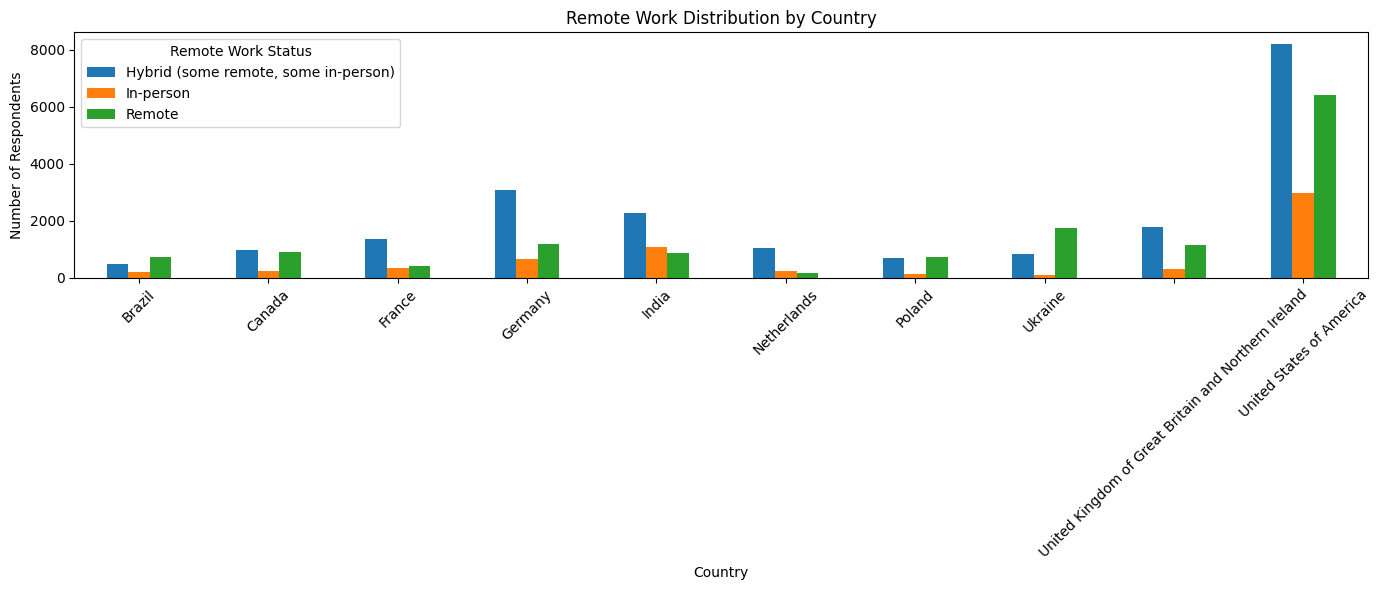

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in 'RemoteWork' or 'Country'
df_remote = df[['Country', 'RemoteWork']].dropna()

# Get top 10 countries by response count
top_countries = df_remote['Country'].value_counts().head(10).index
df_remote_top = df_remote[df_remote['Country'].isin(top_countries)]

# Create cross-tab
remote_by_country = pd.crosstab(df_remote_top['Country'], df_remote_top['RemoteWork'])

# Plot
remote_by_country.plot(kind='bar', stacked=False, figsize=(14, 6))
plt.title('Remote Work Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_558/692357344.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


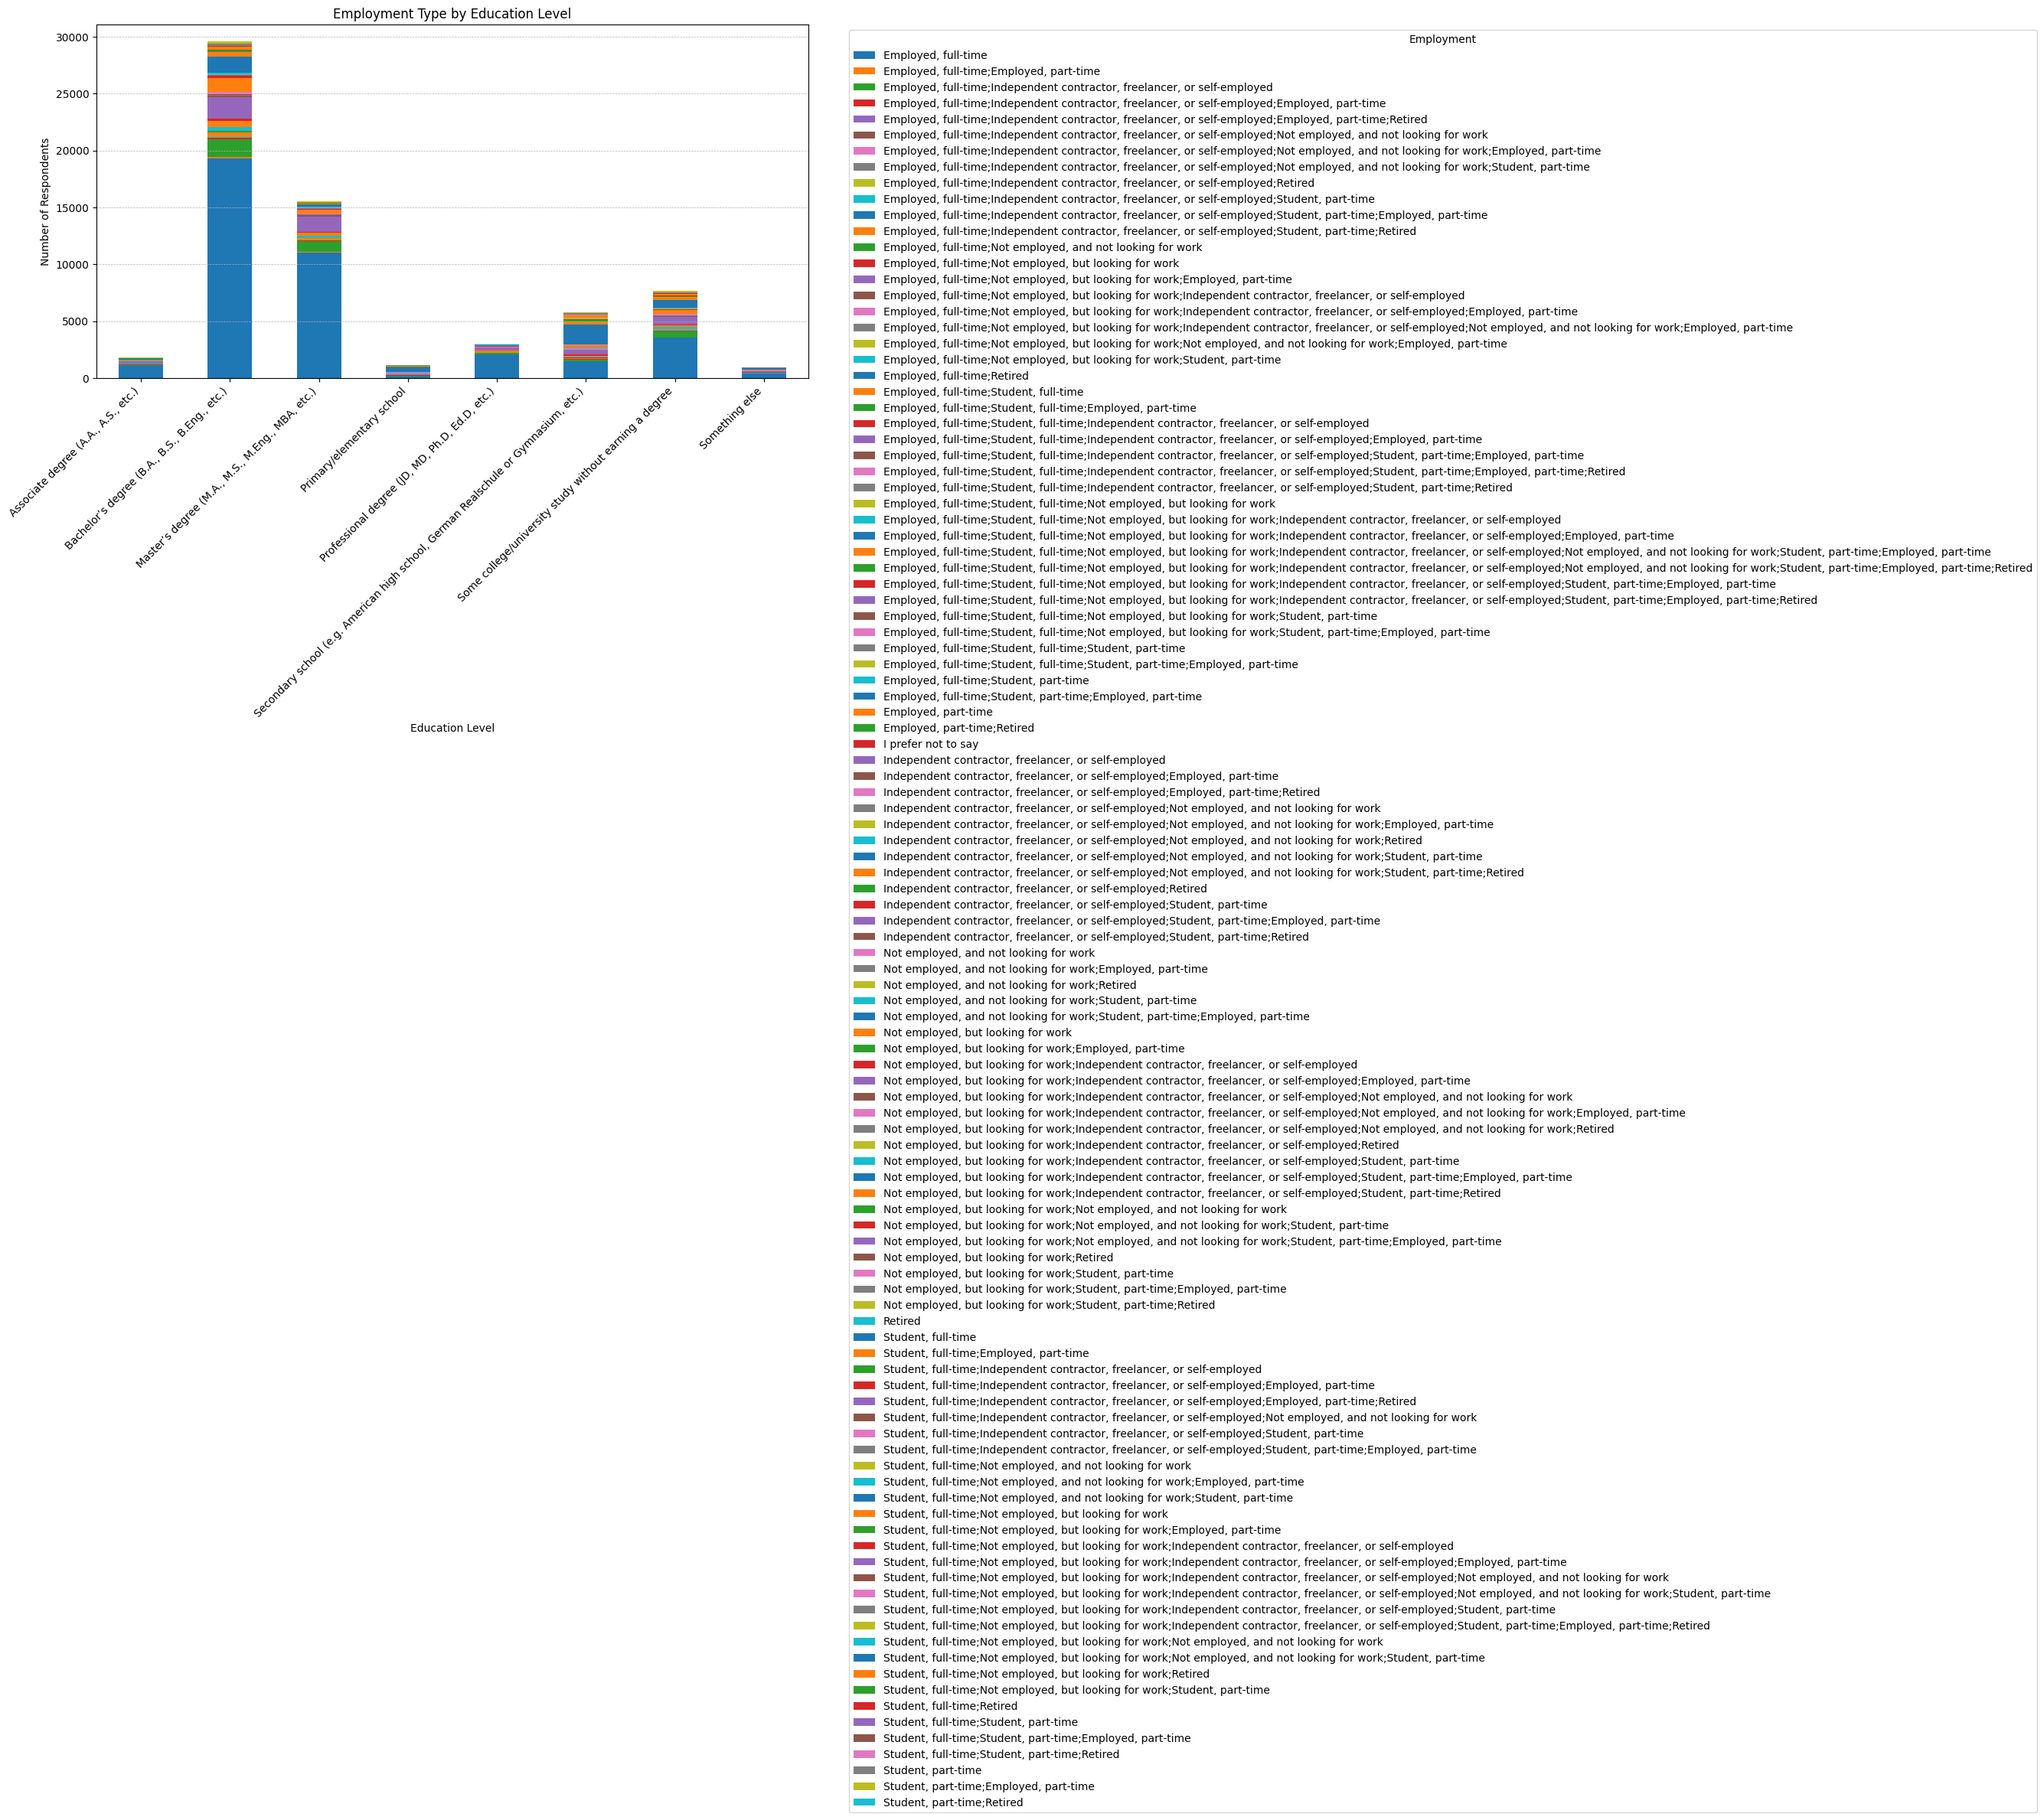

In [19]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure column names are stripped of extra spaces
df.columns = df.columns.str.strip()

# Step 2: Drop missing values in both columns to avoid skewing results
df_clean = df[['Employment', 'EdLevel']].dropna()

# Step 3: Create a cross-tabulation
crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])

# Step 4: Plot a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

# Step 5: Enhance visualization
plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Step 6: Show plot
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
# Step 10: Export Cleaned Data

# Save to CSV
df.to_csv('cleaned_stackoverflow_data.csv', index=False)

print("✅ Cleaned dataset saved as 'cleaned_stackoverflow_data.csv'")


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
